<a href="https://colab.research.google.com/github/nick11roberts/noise-weight-theft/blob/master/mnist_extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 85us/step - loss: 0.2777 - acc: 0.9154 - val_loss: 0.0717 - val_acc: 0.9771
Epoch 2/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0870 - acc: 0.9742 - val_loss: 0.0466 - val_acc: 0.9847
Epoch 3/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0672 - acc: 0.9804 - val_loss: 0.0346 - val_acc: 0.9878
Epoch 4/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0532 - acc: 0.9837 - val_loss: 0.0339 - val_acc: 0.9871
Epoch 5/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0479 - acc: 0.9855 - val_loss: 0.0308 - val_acc: 0.9883
Epoch 6/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0436 - acc: 0.9872 - val_loss: 0.0286 - val_acc: 0.9898
Epoch 7/12
60000/60000 [==============================]

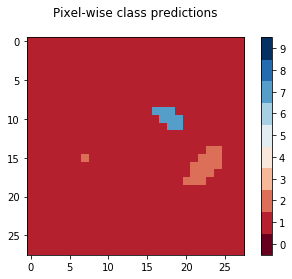

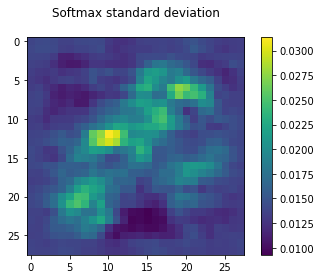

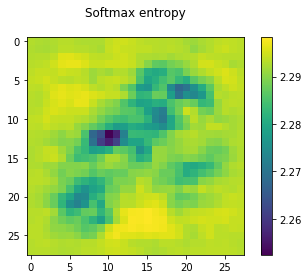

Among each class in isolation, what regions correspond to higher or lower z-scored softmax outputs?


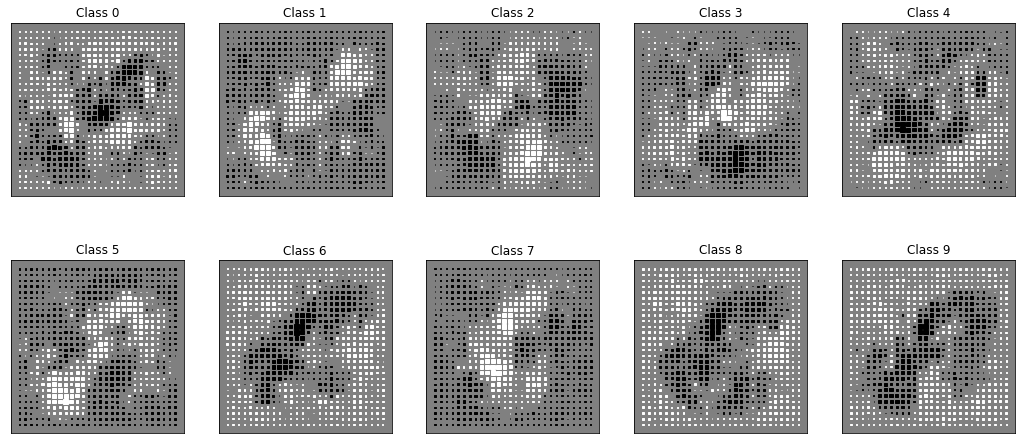

How about when we z-score the outputs globally?


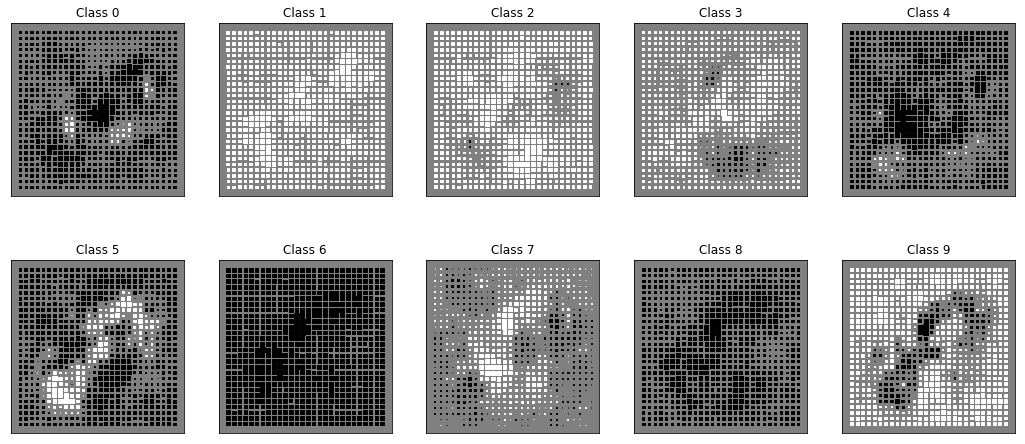

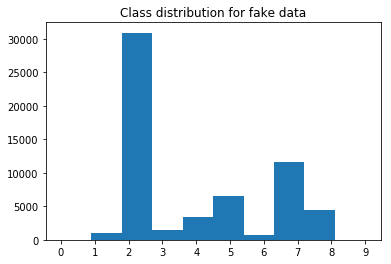

array([6.00000000e+03, 5.95829196e+00, 1.94218755e-01, 4.09556314e+00,
       1.76938956e+00, 9.17431193e-01, 8.88888889e+00, 5.17330574e-01,
       1.36549841e+00, 1.66666667e+02])

In [0]:
from __future__ import print_function
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime, os
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
from itertools import cycle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


batch_size = 128
num_classes = 10
epochs = 12 # TODO

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
#x_train = np.load('kmnist-train-imgs.npz')['arr_0']
#x_test = np.load('kmnist-test-imgs.npz')['arr_0']
#y_train = np.load('kmnist-train-labels.npz')['arr_0']
#y_test = np.load('kmnist-test-labels.npz')['arr_0']

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# the data, split between train and test sets
#x_train = np.load('notmnist_small_x_train.npz')['arr_0']
#x_test = np.load('notmnist_small_x_val.npz')['arr_0']
#y_train = np.load('notmnist_small_y_train.npz')['arr_0']
#y_test = np.load('notmnist_small_y_val.npz')['arr_0']

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



##### COMPLEMENT CODE #####
#x_train = 1.0 - x_train
#x_test = 1.0 - x_test
##### /COMPLEMENT CODE ####


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])










pixel_batch = []

for i in range(28):
  for j in range(28):
    pix_img = np.zeros_like(x_train[0])
    pix_img[i, j, 0] = 1.0 # Could also try random [0, 1] values
    
    pixel_batch.append(pix_img)
    
pixel_batch = np.stack(pixel_batch)









pix_softmax = model.predict(pixel_batch).reshape([28, 28, 10])
pix_predictions = model.predict_classes(pixel_batch).reshape([28, 28])

def discrete_matshow(data):
    #get discrete colormap
    mx = 9
    mn = 0
    cmap = plt.get_cmap('RdBu', mx-mn+1)
    # set limits .5 outside true range
    mat = plt.imshow(data,cmap=cmap,vmin = mn-.5, vmax = mx+.5)
    #tell the colorbar to tick at integers
    cax = plt.colorbar(mat, ticks=np.arange(mn,mx+1))

                       
discrete_matshow(pix_predictions)
plt.title("Pixel-wise class predictions\n")
plt.savefig('fmnist_pixel_class_pred.png')
plt.show()














softmax_std = np.std(pix_softmax, axis=2).reshape(28, 28)
softmax_ent = -np.sum(pix_softmax * np.log(pix_softmax), axis=2)

plt.imshow(softmax_std)
plt.colorbar()
plt.title("Softmax standard deviation\n")
plt.savefig('fmnist_pixel_sd.png')
plt.show()

plt.imshow(softmax_ent)
plt.colorbar()
plt.title("Softmax entropy\n")
plt.savefig('fmnist_pixel_entropy.png')
plt.show()















def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = np.sqrt(np.abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()
    
def shift_scale(x):
  
  mu = np.mean(x)
  sig = np.std(x)
  
  return (x - mu) / sig
    
print('Among each class in isolation, ' +
      'what regions correspond to higher or lower z-scored softmax outputs?')
fig, ax = plt.subplots(2, 5, figsize=(18, 8))
for i in range(10):
  ax[i // 5, i % 5].set_title('Class {}'.format(i))
  hinton(shift_scale(pix_softmax[:, :, i]), ax=ax[i // 5, i % 5])
    
plt.savefig('fmnist_hinton_intra_class.png')
plt.show()
  


print('How about when we z-score the outputs globally?')
fig, ax = plt.subplots(2, 5, figsize=(18, 8))
for i in range(10):
  ax[i // 5, i % 5].set_title('Class {}'.format(i))
  hinton((pix_softmax[:, :, i] - np.mean(pix_softmax)) / np.std(pix_softmax), 
         ax=ax[i // 5, i % 5])
    
plt.savefig('fmnist_hinton_inter_class.png')
plt.show()
  
# Among each class in isolation, what regions in single-pixel space 
# yield higher probabilities


















x_rand = []
y_rand = []
for p in np.arange(0.01, 1, 0.1):
  #x_rand.append(np.random.binomial(1, p, (60000, 28, 28, 1)))
  x_rand.append(np.random.standard_normal(size=(6000, 28, 28, 1)))
  y_rand.append(model.predict(x_rand[-1]))

x_rand = np.vstack(x_rand)
y_rand = np.vstack(y_rand)










plt.xticks(np.arange(0, 10, step=1))
plt.title('Class distribution for fake data')
plt.hist(np.argmax(y_rand, axis=1))
plt.savefig('fmnist_class_dist.png')
plt.show()













class_weights = compute_class_weight('balanced', np.unique(np.argmax(y_rand, axis=1)), np.argmax(y_rand, axis=1), )
class_weights









In [0]:
for i in range(10):
  print(i, np.sum(np.argmax(y_rand, axis=1) == i))

0 1
1 1007
2 30893
3 1465
4 3391
5 6540
6 675
7 11598
8 4394
9 36


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 83us/step - loss: 1.4361 - acc: 0.5908 - val_loss: 1.7259 - val_acc: 0.5063
Epoch 2/10
60000/60000 [==============================] - 4s 70us/step - loss: 1.1065 - acc: 0.7317 - val_loss: 1.4462 - val_acc: 0.5714
Epoch 3/10
60000/60000 [==============================] - 4s 70us/step - loss: 1.0511 - acc: 0.7693 - val_loss: 1.2840 - val_acc: 0.6111
Epoch 4/10
60000/60000 [==============================] - 4s 70us/step - loss: 1.0216 - acc: 0.7918 - val_loss: 1.1550 - val_acc: 0.6304
Epoch 5/10
60000/60000 [==============================] - 4s 71us/step - loss: 1.0005 - acc: 0.8076 - val_loss: 1.0715 - val_acc: 0.6529
Epoch 6/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.9833 - acc: 0.8249 - val_loss: 1.0130 - val_acc: 0.6641
Epoch 7/10
60000/60000 [==============================]

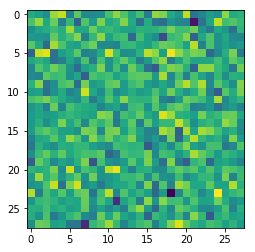

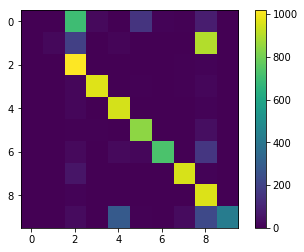

Average precision score, micro-averaged over all classes: 0.80


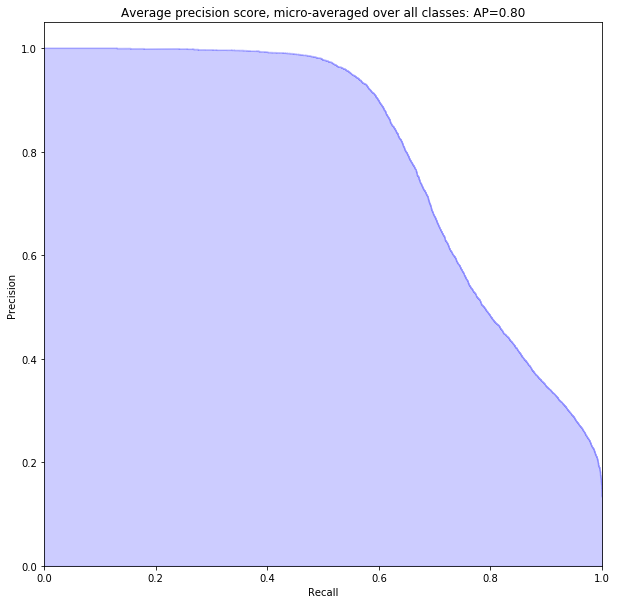

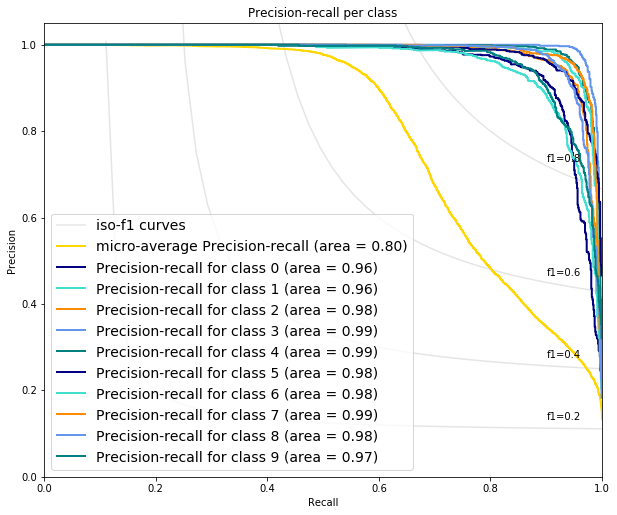

In [0]:








'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''


batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
#(x_train, y_train) = (pixel_batch, pix_softmax_lin)
(x_train, y_train) = (x_rand, y_rand)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

model_steal = Sequential()
model_steal.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model_steal.add(Conv2D(64, (3, 3), activation='relu'))
model_steal.add(MaxPooling2D(pool_size=(2, 2)))
#model_steal.add(Dropout(0.25))
model_steal.add(Flatten())
model_steal.add(Dense(128, activation='relu'))
#model_steal.add(Dropout(0.5))
model_steal.add(Dense(num_classes, activation='softmax'))
'''

model_steal = Sequential()

model_steal.add(Conv2D(6, 5, 5, border_mode='valid', input_shape = (28,28,1)))
model_steal.add(MaxPooling2D(pool_size=(2, 2)))
model_steal.add(Activation("sigmoid"))

model_steal.add(Conv2D(16, 5, 5, border_mode='valid'))
model_steal.add(MaxPooling2D(pool_size=(2, 2)))
model_steal.add(Activation("sigmoid"))
#model_steal.add(Dropout(0.5))

model_steal.add(Conv2D(120, 1, 1, border_mode='valid'))

model_steal.add(Flatten())
model_steal.add(Dense(84))
model_steal.add(Activation("sigmoid"))
model_steal.add(Dense(10))
model_steal.add(Activation('softmax'))
'''

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

model_steal.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model_steal.fit(x_train, y_train,
               batch_size=batch_size,
               epochs=10, # TODO
               verbose=1,
               validation_data=(x_test, y_test), 
               class_weight=class_weights,
               callbacks=[tensorboard_callback])


score = model_steal.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


















plt.imshow(x_train[50000, :, :, 0])
plt.savefig('fmnist_rand_example.png')
plt.show()













y_pred = model_steal.predict(x_test)

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
plt.imshow(matrix)
plt.colorbar()
plt.savefig('fmnist_confusion.png')
plt.show()














n_classes = 10
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_pred[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_pred[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_pred.ravel())
average_precision["micro"] = average_precision_score(y_test, y_pred,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))



plt.figure(figsize=(10, 10))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))
plt.savefig('fmnist_pr_ma.png')
plt.show()


# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(10, 10))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall per class')
plt.legend(lines, labels, prop=dict(size=14))

plt.savefig('fmnist_pr_multi.png')
plt.show()















In [0]:
x_test[0, :, :, 0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    